## Objective

**Build, train, test, and deploy an artificial intelligence (AI) model to predict sentiment from thousands of tweets.**

This project aims to:

* **Understand public opinion:** Analyze tweets to gauge people's feelings about products, services, or topics.
* **Improve customer satisfaction:** Identify areas where businesses can enhance their offerings based on customer sentiment.
* **Optimize marketing strategies:** Tailor marketing campaigns to align with public sentiment and target the right audience.

**Key tasks:**

* **Data collection and preprocessing:** Gather relevant tweets and prepare them for analysis.
* **Model development:** Select and train appropriate machine learning algorithms for sentiment classification.
* **Model evaluation:** Assess the model's performance using relevant metrics.
* **Deployment:** Integrate the model into a real-world application for practical use.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tweets_df = pd.read_csv('twitter.csv')

In [3]:
tweets_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
tweets_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [5]:
tweets_df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [6]:
tweets_df['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [7]:
tweets_df = tweets_df.drop(['id'], axis=1)

In [8]:
tweets_df

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


<Axes: >

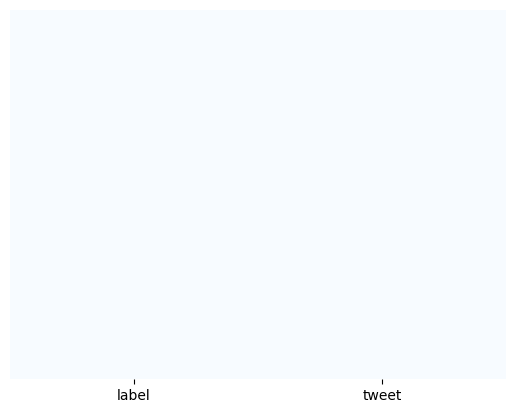

In [9]:
sns.heatmap(tweets_df.isnull(), yticklabels = False, cbar = False, cmap = "Blues")

array([[<Axes: title={'center': 'label'}>]], dtype=object)

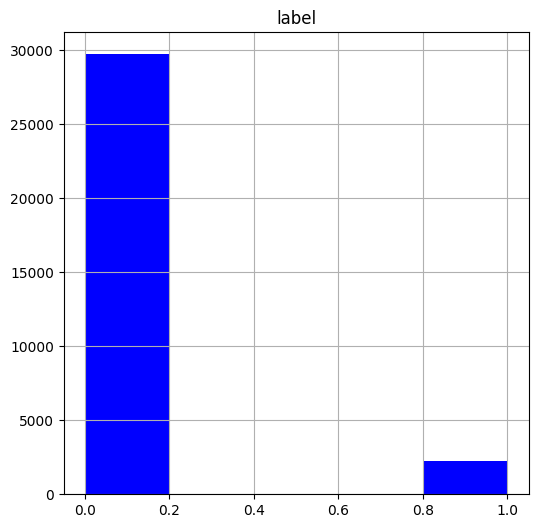

In [10]:
tweets_df.hist(bins=5, figsize = (6,6), color = 'b')

In [11]:
#sns.countplot(tweets_df['label'], label = 'Count')

In [12]:
tweets_df['length'] = tweets_df['tweet'].apply(len)

In [13]:
tweets_df.head()

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39


In [14]:
tweets_df.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


In [15]:
tweets_df[tweets_df['length'] == 11]['tweet']

25195    i love you 
Name: tweet, dtype: object

In [16]:
tweets_df[tweets_df['length'] == 84]['tweet']

43       my mom shares the same bihday as @user   bihda...
220      g o a l s ð repost from @user #propey #ocea...
640      oscar tabarez talks luis suarezâs angry reac...
723       @user another hands &amp; feet complete!! ber...
742      because great things never came from comfo zon...
                               ...                        
31445    .@user on making choices to keep herself   as ...
31448    i'm a gordo. #passpo #florence #firenze #italy...
31509    just 3 keys that are found on your computer to...
31857    traveling happy #family   holidays #car #sunny...
31883    we spent #familytime by doing simple wefie, we...
Name: tweet, Length: 333, dtype: object

In [17]:
#sns.countplot(tweets_df['length'], label = 'Count')

<Axes: ylabel='Frequency'>

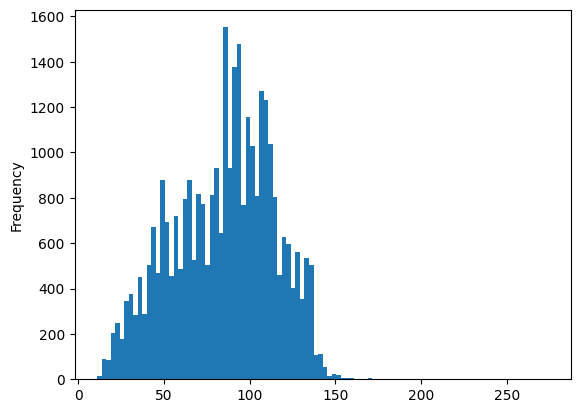

In [18]:
tweets_df['length'].plot(bins = 100, kind = 'hist')

In [19]:
positive = tweets_df[tweets_df['label'] == 0]
positive

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31956,0,off fishing tomorrow @user carnt wait first ti...,61
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63


In [20]:
negative = tweets_df[tweets_df['label'] == 1]
negative

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,1,@user @user you don't have the balls to hashta...,112
31948,1,"makes you ask yourself, who am i? then am i a...",87


In [21]:
sentences = tweets_df['tweet'].to_list()

In [22]:
len(sentences)

31962

In [23]:
sentences_as_one_string = " ".join(sentences)

In [24]:
#sentences_as_one_string

In [25]:
! pip install wordcloud

In [26]:
from wordcloud import WordCloud

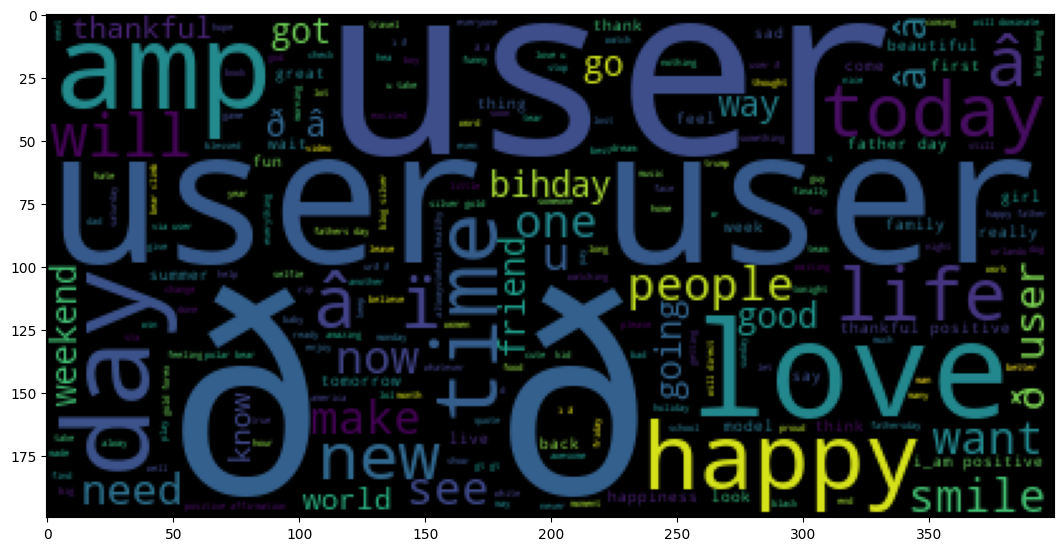

In [27]:
plt.figure(figsize = (13,13))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [28]:
negative_list = negative['tweet'].to_list()

In [29]:
negative_single_string = " ".join(negative_list)

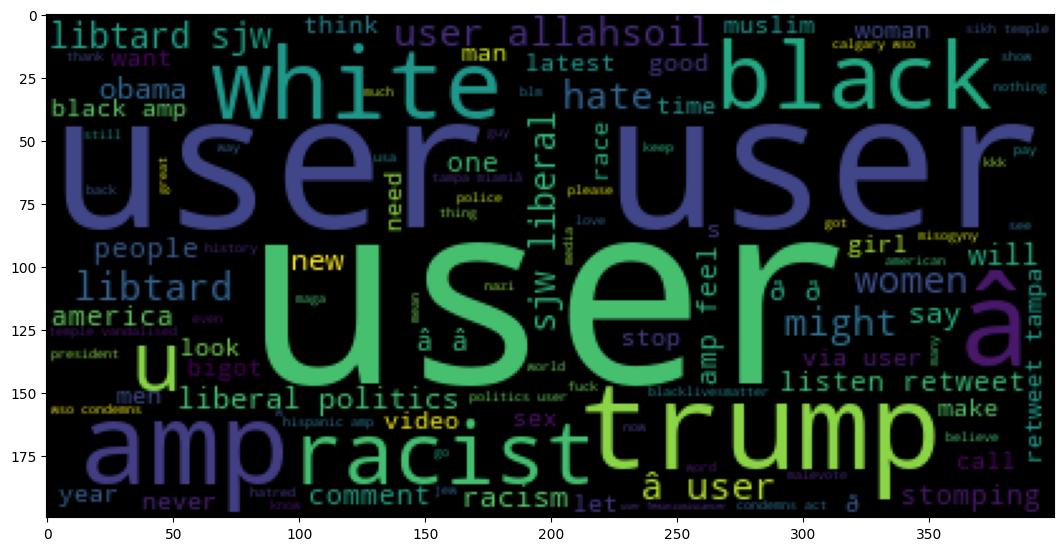

In [30]:
plt.figure(figsize = (13,13))
plt.imshow(WordCloud().generate(negative_single_string))

In [31]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [32]:
Test = '$I love AI & Machine Learning!!'

In [33]:
test_punc_removed = [ char   for char in Test if char not in string.punctuation]

In [34]:
test_punc_removed_join = "".join(test_punc_removed)
test_punc_removed_join

'I love AI  Machine Learning'

In [35]:
Test = 'Good morning beautiful people :)... I am having fun learning Machine learning and AI!!'

In [36]:
test_punc_removed = [ char   for char in Test if char not in string.punctuation]
#test_punc_removed

In [37]:
test_punc_removed_join = "".join(test_punc_removed)
test_punc_removed_join

'Good morning beautiful people  I am having fun learning Machine learning and AI'

In [38]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\naven\AppData\Lo
[nltk_data]     cal\Programs\Python\Python312\share\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
from nltk.corpus import stopwords

In [40]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [41]:
Test_punc_removed_join = 'I enjoy coding, programming and Artificial intelligence'

In [42]:
Test_punc_removed_join_clean = [word  for word in Test_punc_removed_join.split() if word.lower not in stopwords.words('english')]

In [43]:
Test_punc_removed_join_clean

['I', 'enjoy', 'coding,', 'programming', 'and', 'Artificial', 'intelligence']

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

In [45]:
sample_data = ['This is the first paper.','This document is the second paper.','And this is the third one.','Is this the first paper?']

In [46]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [47]:
print(X.toarray())

[[0 0 1 1 0 1 0 1 0 1]
 [0 1 0 1 0 1 1 1 0 1]
 [1 0 0 1 1 0 0 1 1 1]
 [0 0 1 1 0 1 0 1 0 1]]


In [48]:
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [49]:
tweets_df_clean = tweets_df['tweet'].apply(message_cleaning)

In [50]:
print(tweets_df_clean[5])

['22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo']


In [51]:
print(tweets_df['tweet'][5])

[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  


In [52]:
from sklearn.feature_extraction.text import CountVectorizer

In [53]:
vectorizer = CountVectorizer(analyzer = message_cleaning, dtype = np.uint8)
tweets_countvectorizer = vectorizer.fit_transform(tweets_df['tweet'])

In [58]:
tweets_countvectorizer.shape

(31962, 47386)

In [59]:
X = pd.DataFrame(tweets_countvectorizer.toarray())

In [54]:
vocab = vectorizer.vocabulary_
vocab

{'user': 40768,
 'father': 14031,
 'dysfunctional': 12311,
 'selfish': 34300,
 'drags': 11974,
 'kids': 21690,
 'dysfunction': 12310,
 'run': 33375,
 'thanks': 38394,
 'lyft': 23899,
 'credit': 9700,
 'cant': 7190,
 'use': 40759,
 'cause': 7512,
 'dont': 11788,
 'offer': 28031,
 'wheelchair': 42228,
 'vans': 40928,
 'pdx': 29332,
 'disapointed': 11358,
 'getthanked': 16174,
 'bihday': 5243,
 'majesty': 24119,
 'model': 25568,
 'love': 23479,
 'u': 40247,
 'take': 37803,
 'time': 39042,
 'urð\x9f\x93±': 40738,
 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91': 46774,
 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦': 46009,
 'factsguide': 13766,
 'society': 35749,
 'motivation': 25927,
 '22': 640,
 'huge': 18991,
 'fan': 13899,
 'fare': 13935,
 'big': 5181,
 'talking': 37842,
 'leave': 22481,
 'chaos': 7775,
 'pay': 29265,
 'disputes': 11485,
 'get': 16144,
 'allshowandnogo': 2415,
 'camping': 7108,
 'tomorrow': 39318,
 'dannyâ\x80¦': 10312,
 'next': 27118,
 'school': 33954,
 'year': 43314,
 'examsð\

In [55]:
y = tweets_df['label']

In [60]:
X.shape

(31962, 47386)

In [57]:
y.shape

(31962,)

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [63]:
from sklearn.naive_bayes import MultinomialNB

In [64]:
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [65]:
from sklearn.metrics import classification_report, confusion_matrix

In [66]:
y_predict_test = NB_classifier.predict(X_test)

In [67]:
cm = confusion_matrix(y_test, y_predict_test)

<Axes: >

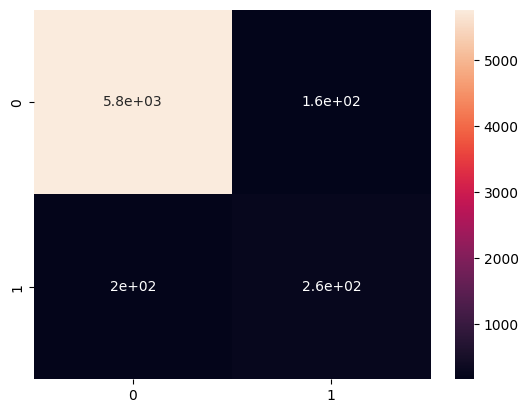

In [70]:
sns.heatmap(cm, annot=True)

In [71]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5934
           1       0.61      0.57      0.59       459

    accuracy                           0.94      6393
   macro avg       0.79      0.77      0.78      6393
weighted avg       0.94      0.94      0.94      6393

